# Spatial interpolation for biogeographic traits

To predict microbial traits in the unsampled areas, we also implemented several function for spatial interpolations. See the follwoing examples for details. 

Here we need three R packages for this section of [microgeo](https://github.com/ChaonanLi/microgeo) R package tutorial. Just run the following codes to import them into R environment.

In [1]:
suppressMessages(require("magrittr")) 
require("ggplot2")  %>% suppressMessages()
require("microgeo") %>% suppressMessages()

If the Chinese characters cannot be displayed correctly, please run the following codes to set locale to `UTF-8`:

In [2]:
prev_locale <- Sys.setlocale("LC_CTYPE", "C.UTF-8") 

We need a standard microgeo dataset for the presentations in the section of tutorial.

In [3]:
# Use the map downloaded from DataV.GeoAtlas
data(qtp)
map <- read_aliyun_map(adcode = c(540000, 630000, 510000)) %>% suppressMessages() 
dataset.dts.aliyun <- create_dataset(mat = qtp$asv, ant = qtp$tax, met = qtp$met, map = map,
                                     phy = qtp$tre, env = qtp$env, lon = "longitude", lat = "latitude") 
dataset.dts.aliyun %<>% rarefy_count_table() 
dataset.dts.aliyun %<>% tidy_dataset()
dataset.dts.aliyun %<>% calc_alpha_div(measures = c("observed", "shannon")) 
dataset.dts.aliyun %<>% calc_beta_div(measures = c("bray", "jaccard")) 
dataset.dts.aliyun %>% show_dataset()

ℹ [2024-01-14 11:37:21] INFO ==> all samples fall within the map area!

ℹ [2024-01-14 11:37:21] INFO ==> dataset has been created successfully!

ℹ [2024-01-14 11:37:21] INFO ==> use `object %>% show_dataset()` to check the summary of dataset.

ℹ [2024-01-14 11:37:24] INFO ==> the ASV/gene abundance table has been rarefied with a sub-sample depth of 5310

✔ [2024-01-14 11:37:28] SAVE ==> results have been saved to: object$div$alpha

✔ [2024-01-14 11:38:11] SAVE ==> results have been saved to: object$div$beta



── The Summary of Microgeo Dataset ─────────────────────────────────────────────


ℹ object$mat: 6808 ASVs/genes and 1244 samples [subsample depth: 5310]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$div$alpha: 2 alpha diversity index/indices (observed, shannon)

✔ object$div$beta: 2 beta diversity distance matrix/matrices (bray, jaccard)




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


Now, let's go through each of these functions and see how they are used.

## 1. Nearest neighbour interpolation

! [2024-01-14 11:38:11] WARN ==> only use 420 out of 1244 sampling sites for interpolation!

! [2024-01-14 11:38:12] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



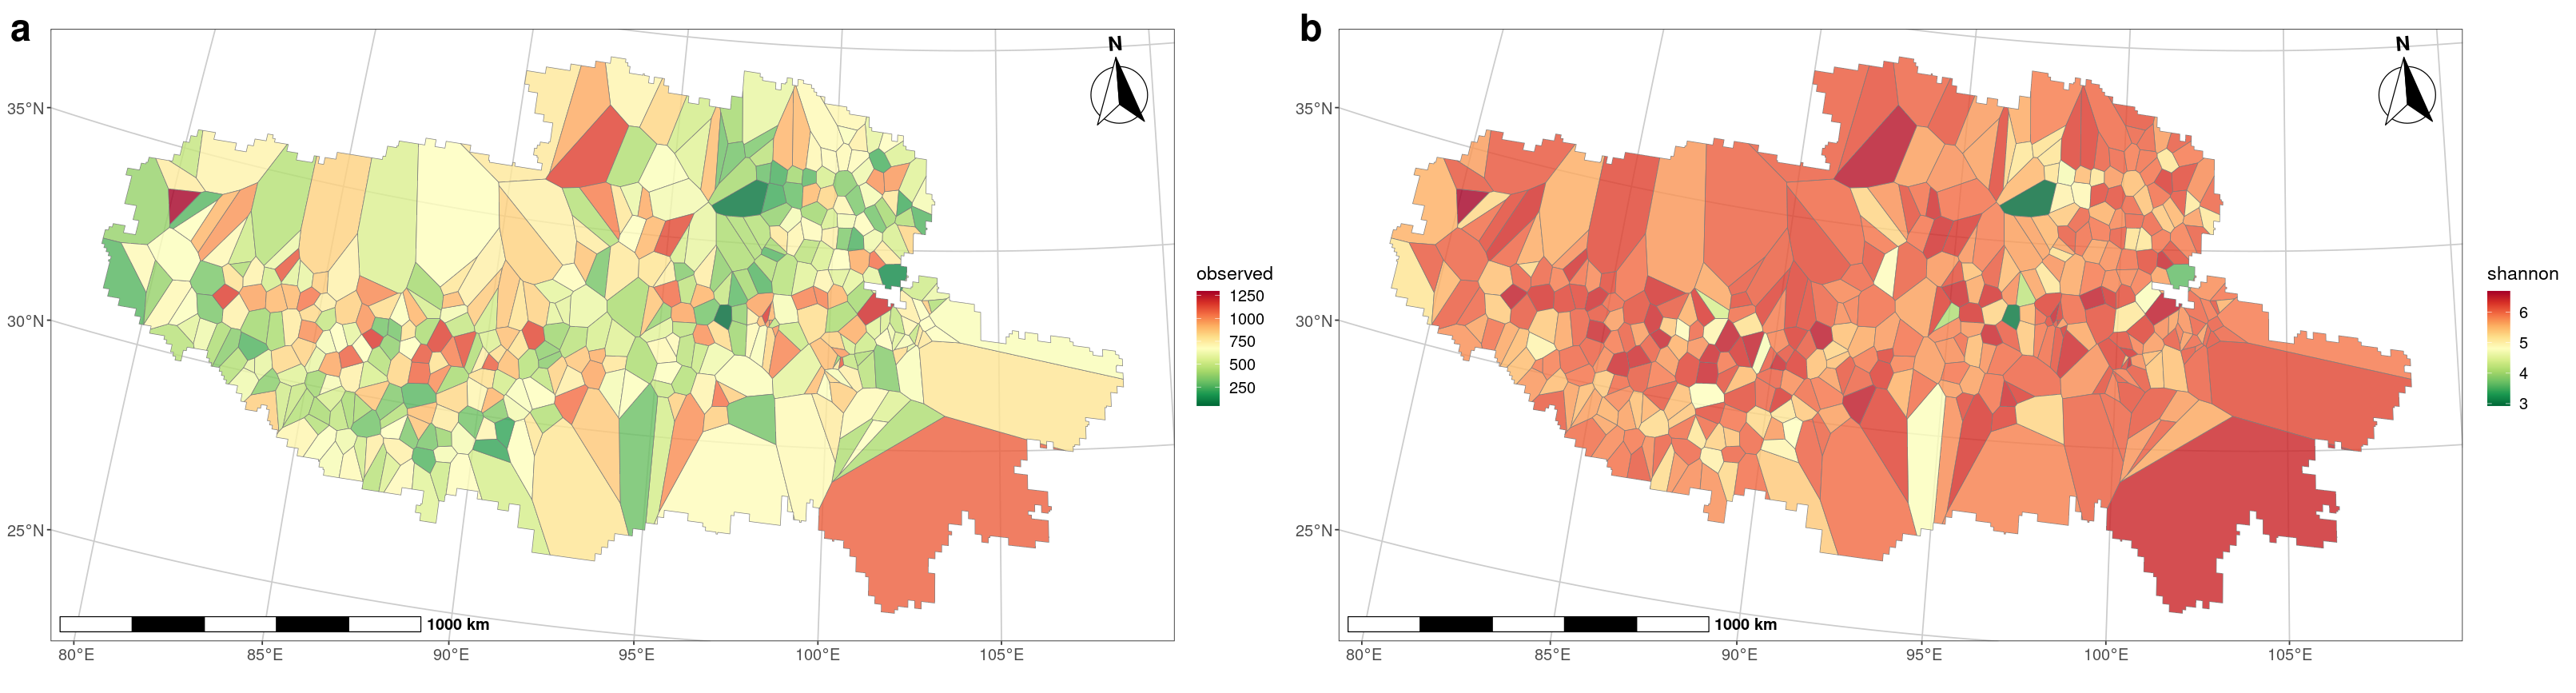

In [4]:
# Nearest neighbour interpolation for alpha diversity indices
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.23)
sim1 <- interp_nen(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'observed', trim.dup = TRUE) %>% 
    plot_nmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()
sim2 <- interp_nen(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'shannon', trim.dup = TRUE) %>%
    plot_nmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(sim1, sim2, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 2. Polynomial fit (2nd order) interpolation

! [2024-01-14 11:38:13] WARN ==> only use 420 out of 1244 sampling sites for interpolation!

! [2024-01-14 11:38:13] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



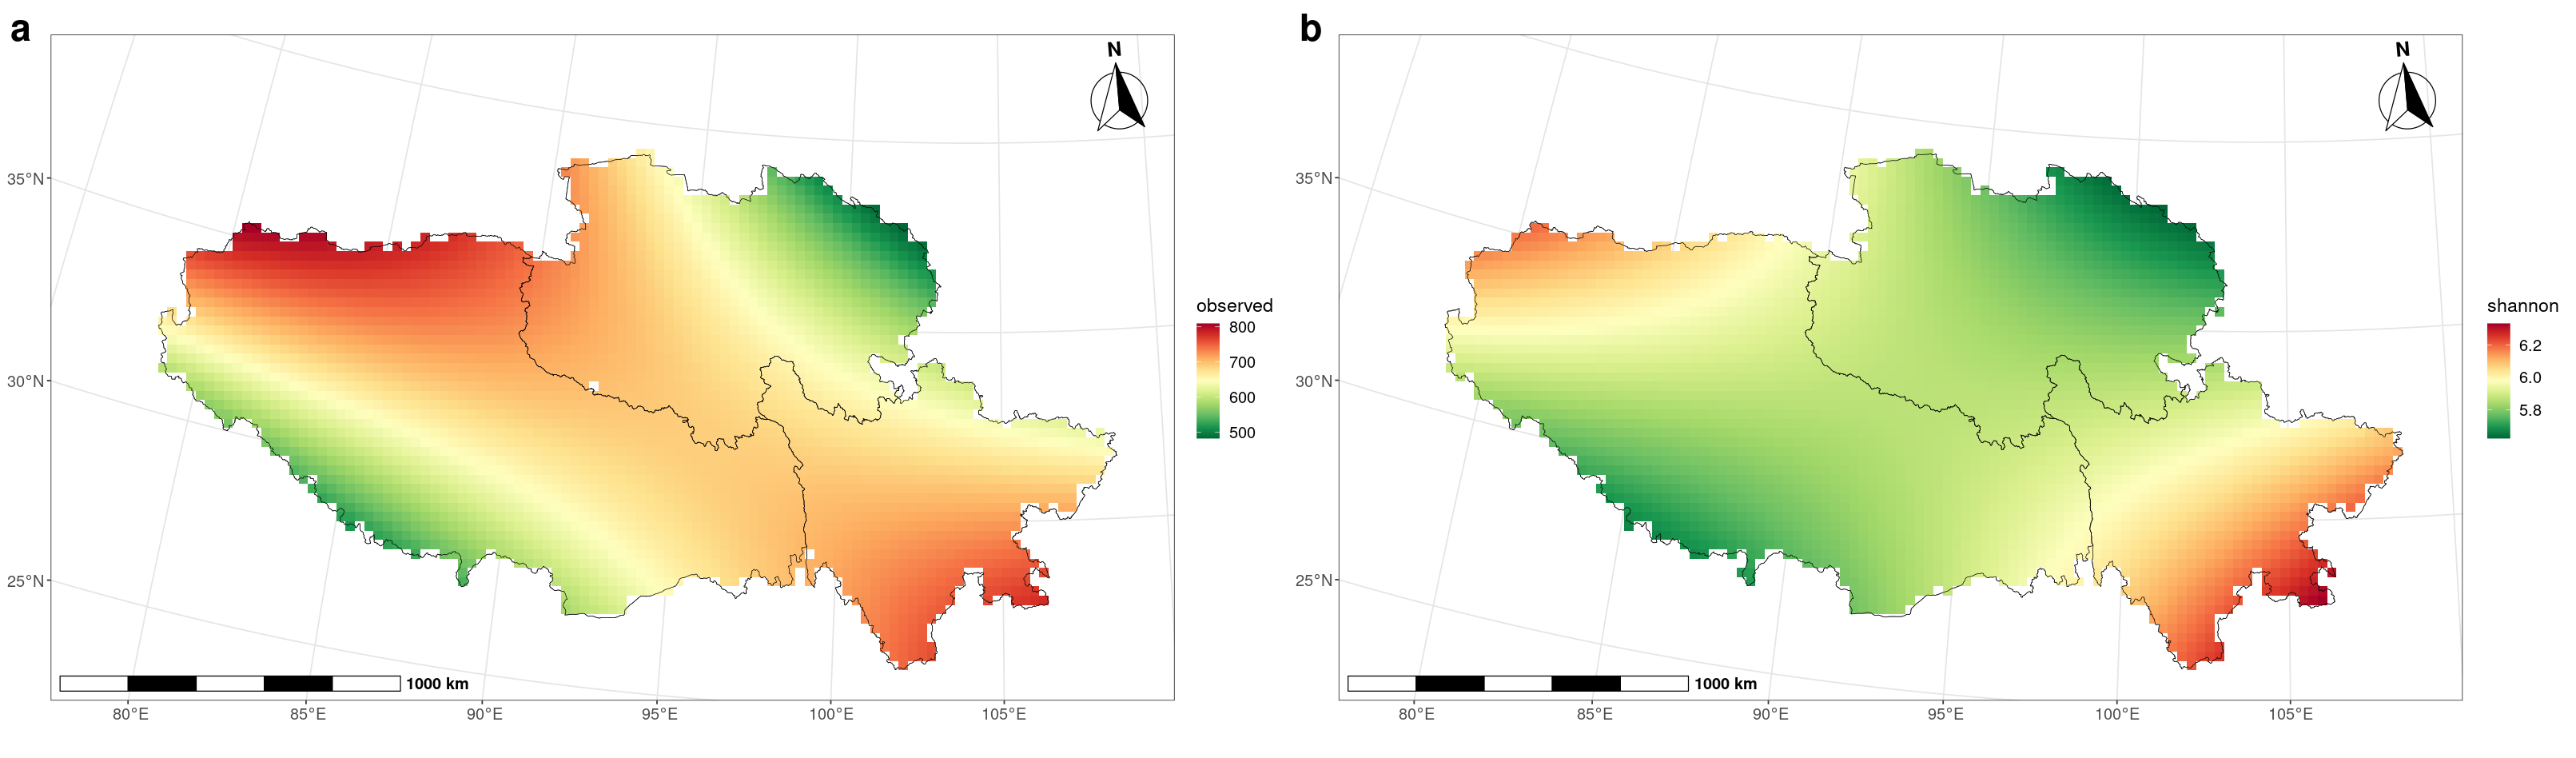

In [5]:
# 2nd polynomial fit interpolation for alpha diversity indices
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
pol.rst.observed <- interp_pol(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'observed', trim.dup = TRUE)
pol.rst.shannon  <- interp_pol(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'shannon', trim.dup = TRUE)
sim3 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = pol.rst.observed) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
sim4 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = pol.rst.shannon) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
cowplot::plot_grid(sim3, sim4, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 3. Inverse distance weighting (IDW) interpolation

! [2024-01-14 11:38:15] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[inverse distance weighted interpolation]


! [2024-01-14 11:38:20] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[inverse distance weighted interpolation]


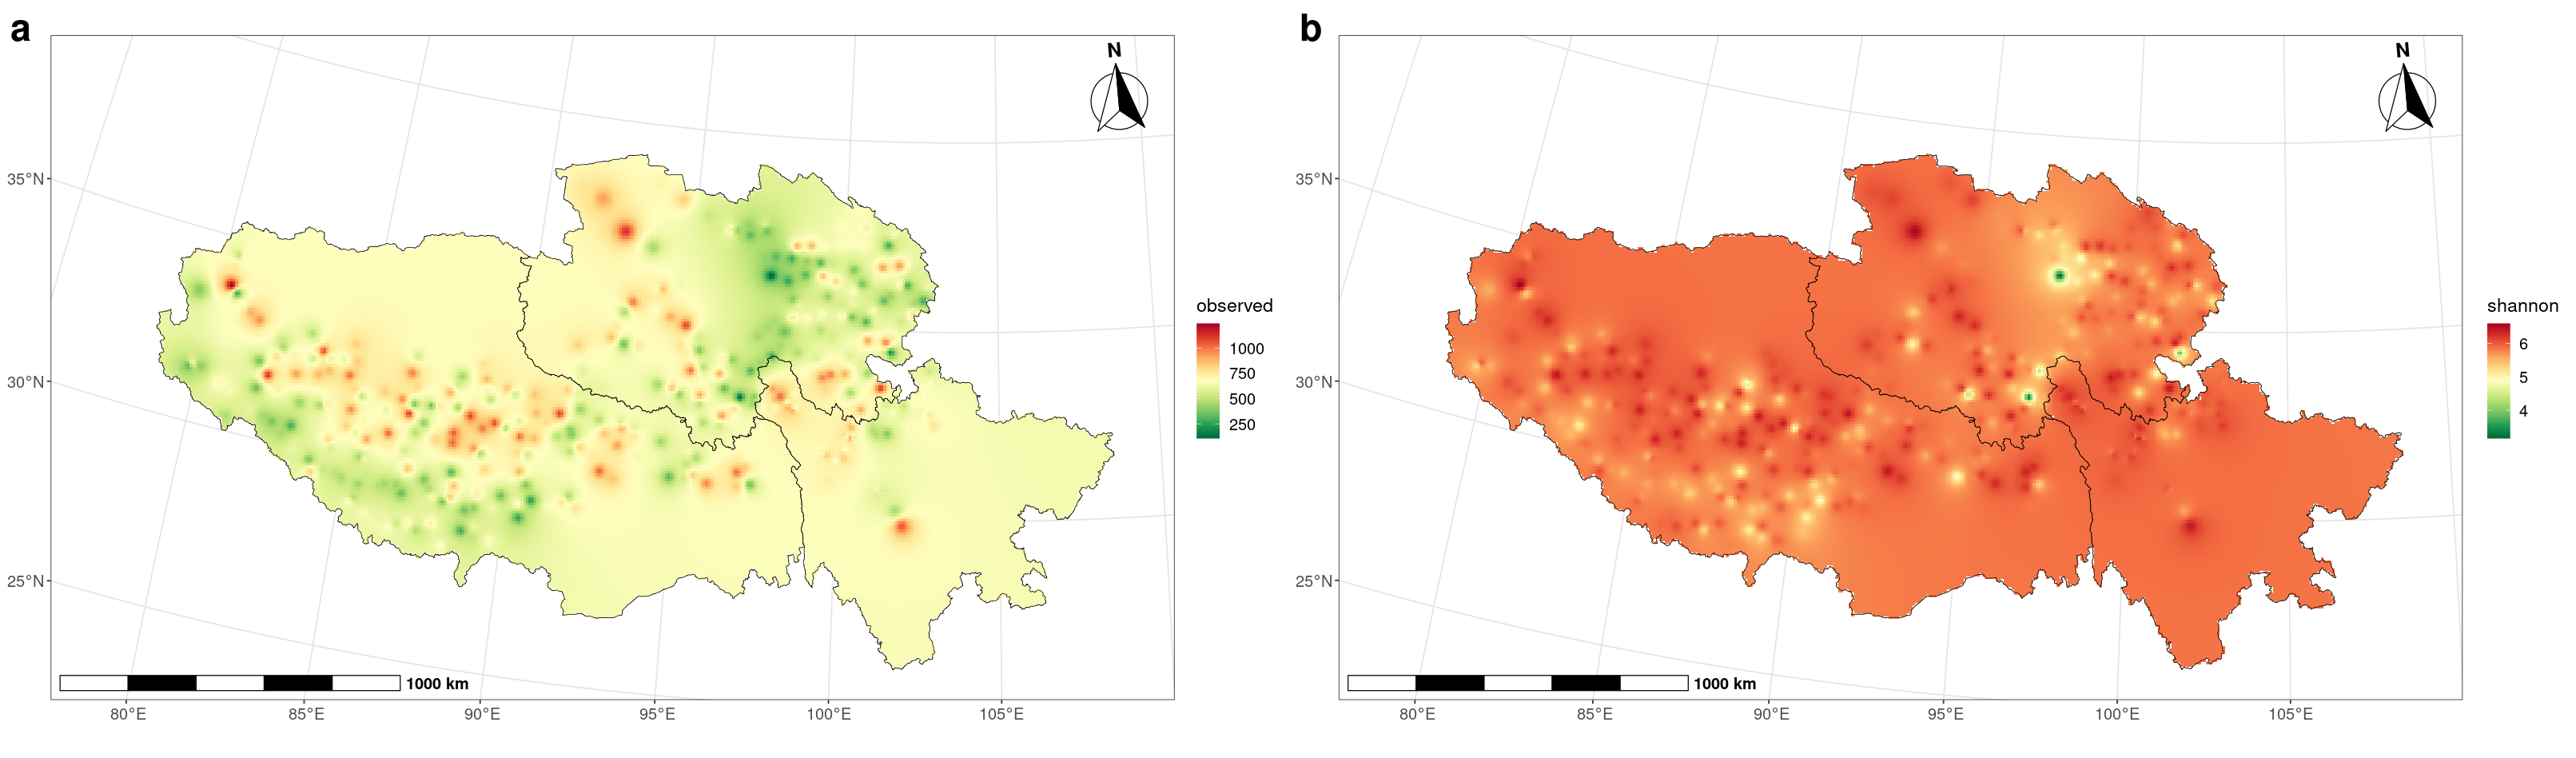

In [6]:
# Inverse distance weighting (IDW) interpolation for alpha diversity indices(type = 'regular')
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
idw.rst.observed <- interp_idw(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'observed', type = 'regular', trim.dup = TRUE)
idw.rst.shannon  <- interp_idw(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'shannon', type = 'regular', trim.dup = TRUE)
sim5 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = idw.rst.observed) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
sim6 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = idw.rst.shannon) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
cowplot::plot_grid(sim5, sim6, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

! [2024-01-14 11:38:26] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[inverse distance weighted interpolation]


! [2024-01-14 11:38:33] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[inverse distance weighted interpolation]


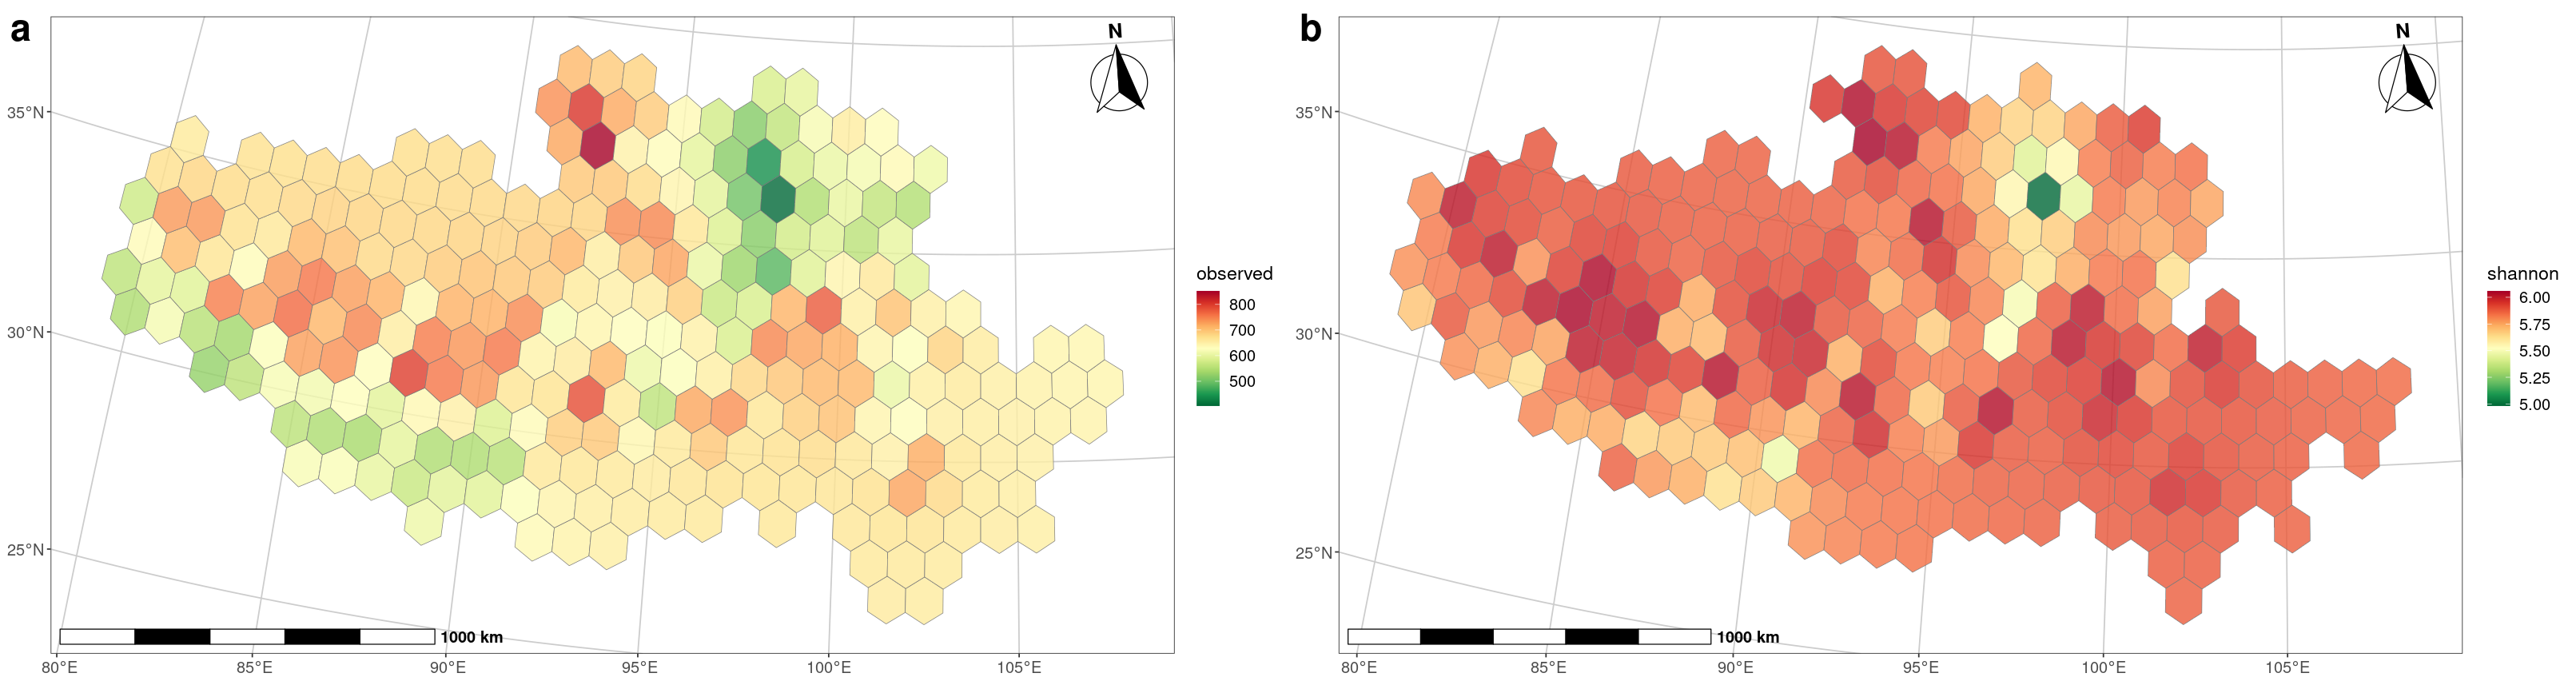

In [7]:
# Inverse distance weighting (IDW) interpolation for alpha diversity indices (type = 'hexagonal')
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.23)
sim7 <- interp_idw(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'observed', type = 'hexagonal', trim.dup = TRUE) %>%
    plot_imap() %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
sim8 <- interp_idw(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, var = 'shannon', type = 'hexagonal', trim.dup = TRUE) %>%
    plot_imap() %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
cowplot::plot_grid(sim7, sim8, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 4. Kriging interpolation

! [2024-01-14 11:38:41] WARN ==> only use 420 out of 1244 sampling sites for interpolation!

! [2024-01-14 11:38:41] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



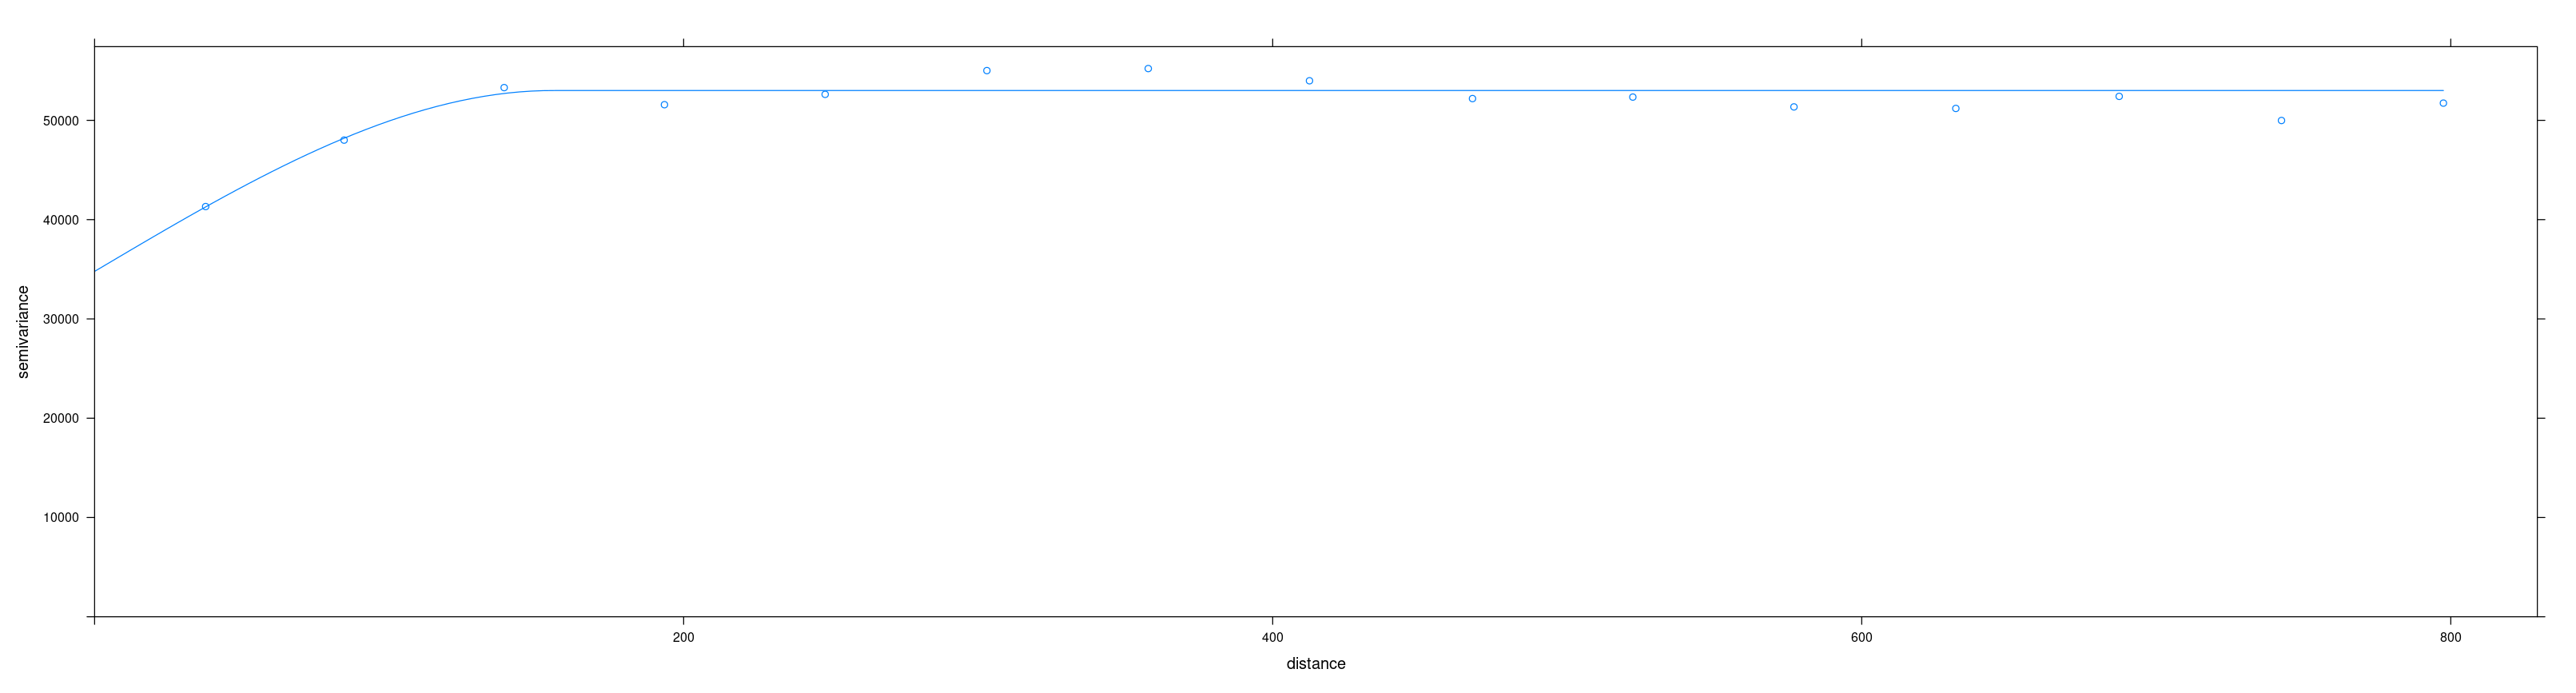

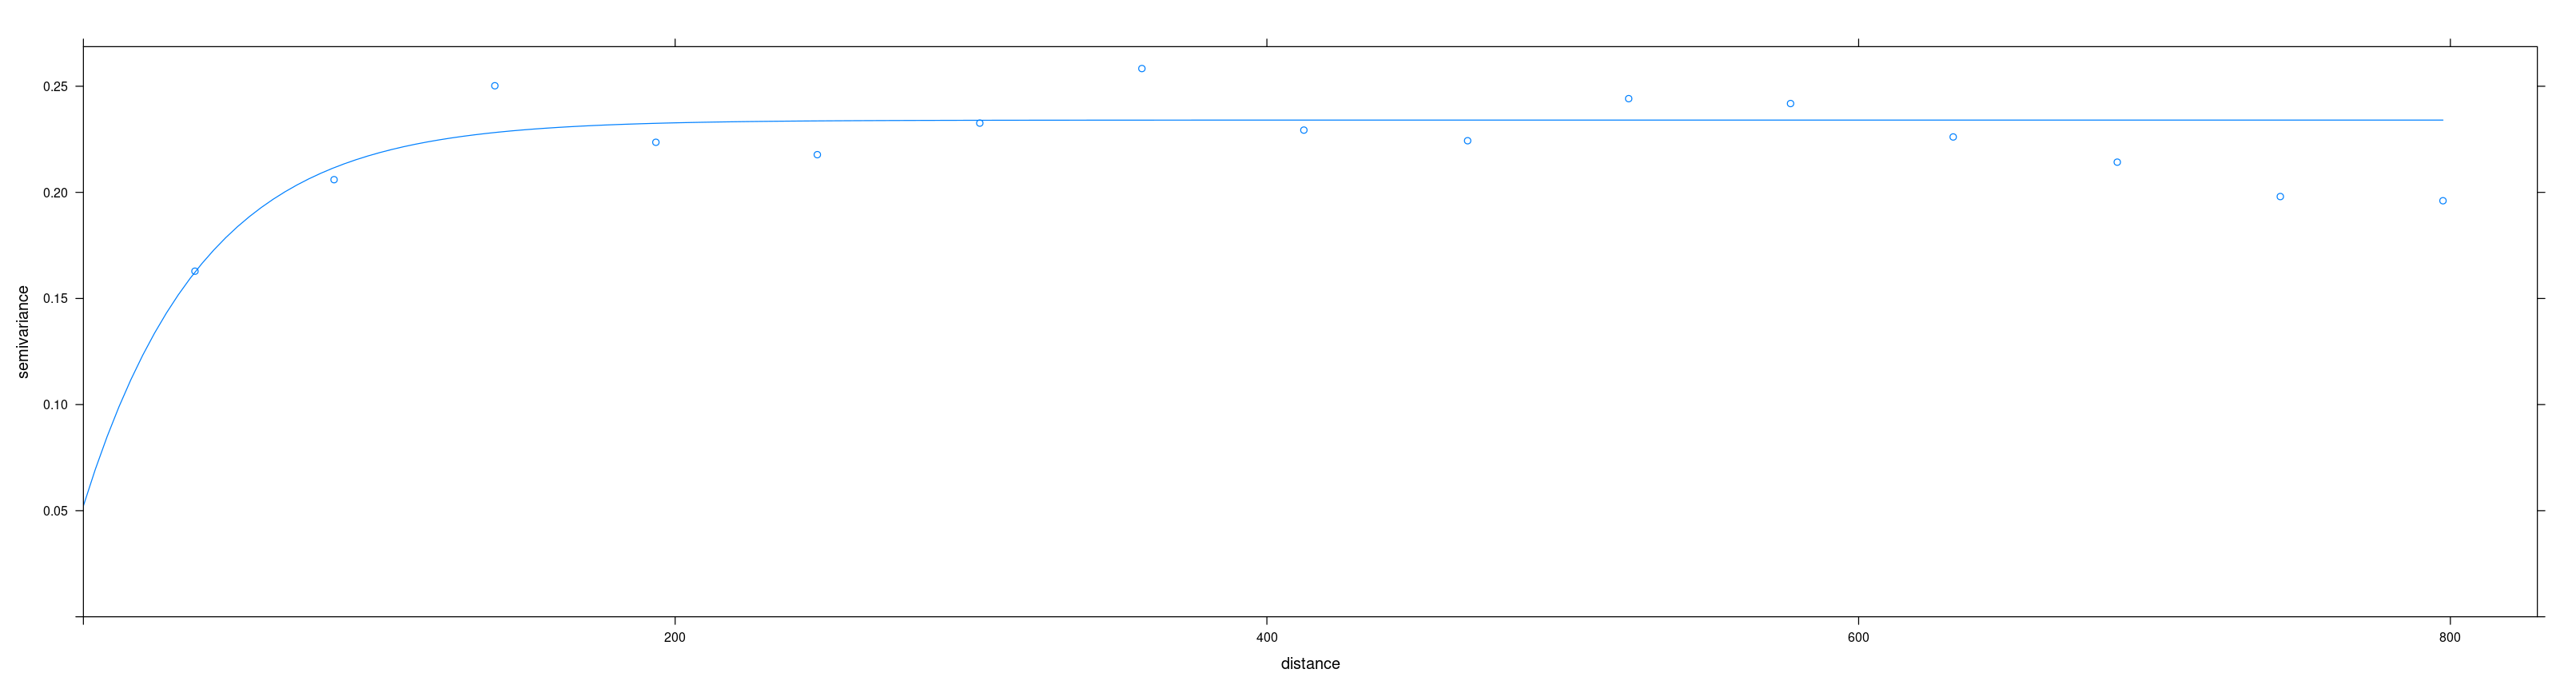

In [8]:
# Test models
interp_kri(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, 
           var = 'observed', model = 'Sph', test.model = TRUE, trim.dup = TRUE)
interp_kri(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, 
          var = 'shannon', model = 'Mat', test.model = TRUE, trim.dup = TRUE)

In [9]:
# Perform kriging interpolation for alpha diversity indices
kri.rst.observed <- interp_kri(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, 
                               var = 'observed', model = 'Sph', trim.dup = TRUE)
kri.rst.shannon <- interp_kri(map = dataset.dts.aliyun$map, met = dataset.dts.aliyun$met, dat = dataset.dts.aliyun$div$alpha, 
                              var = 'shannon', model = 'Mat', trim.dup = TRUE)

! [2024-01-14 11:38:41] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[using ordinary kriging]


! [2024-01-14 11:38:43] WARN ==> only use 420 out of 1244 sampling sites for interpolation!



[using ordinary kriging]


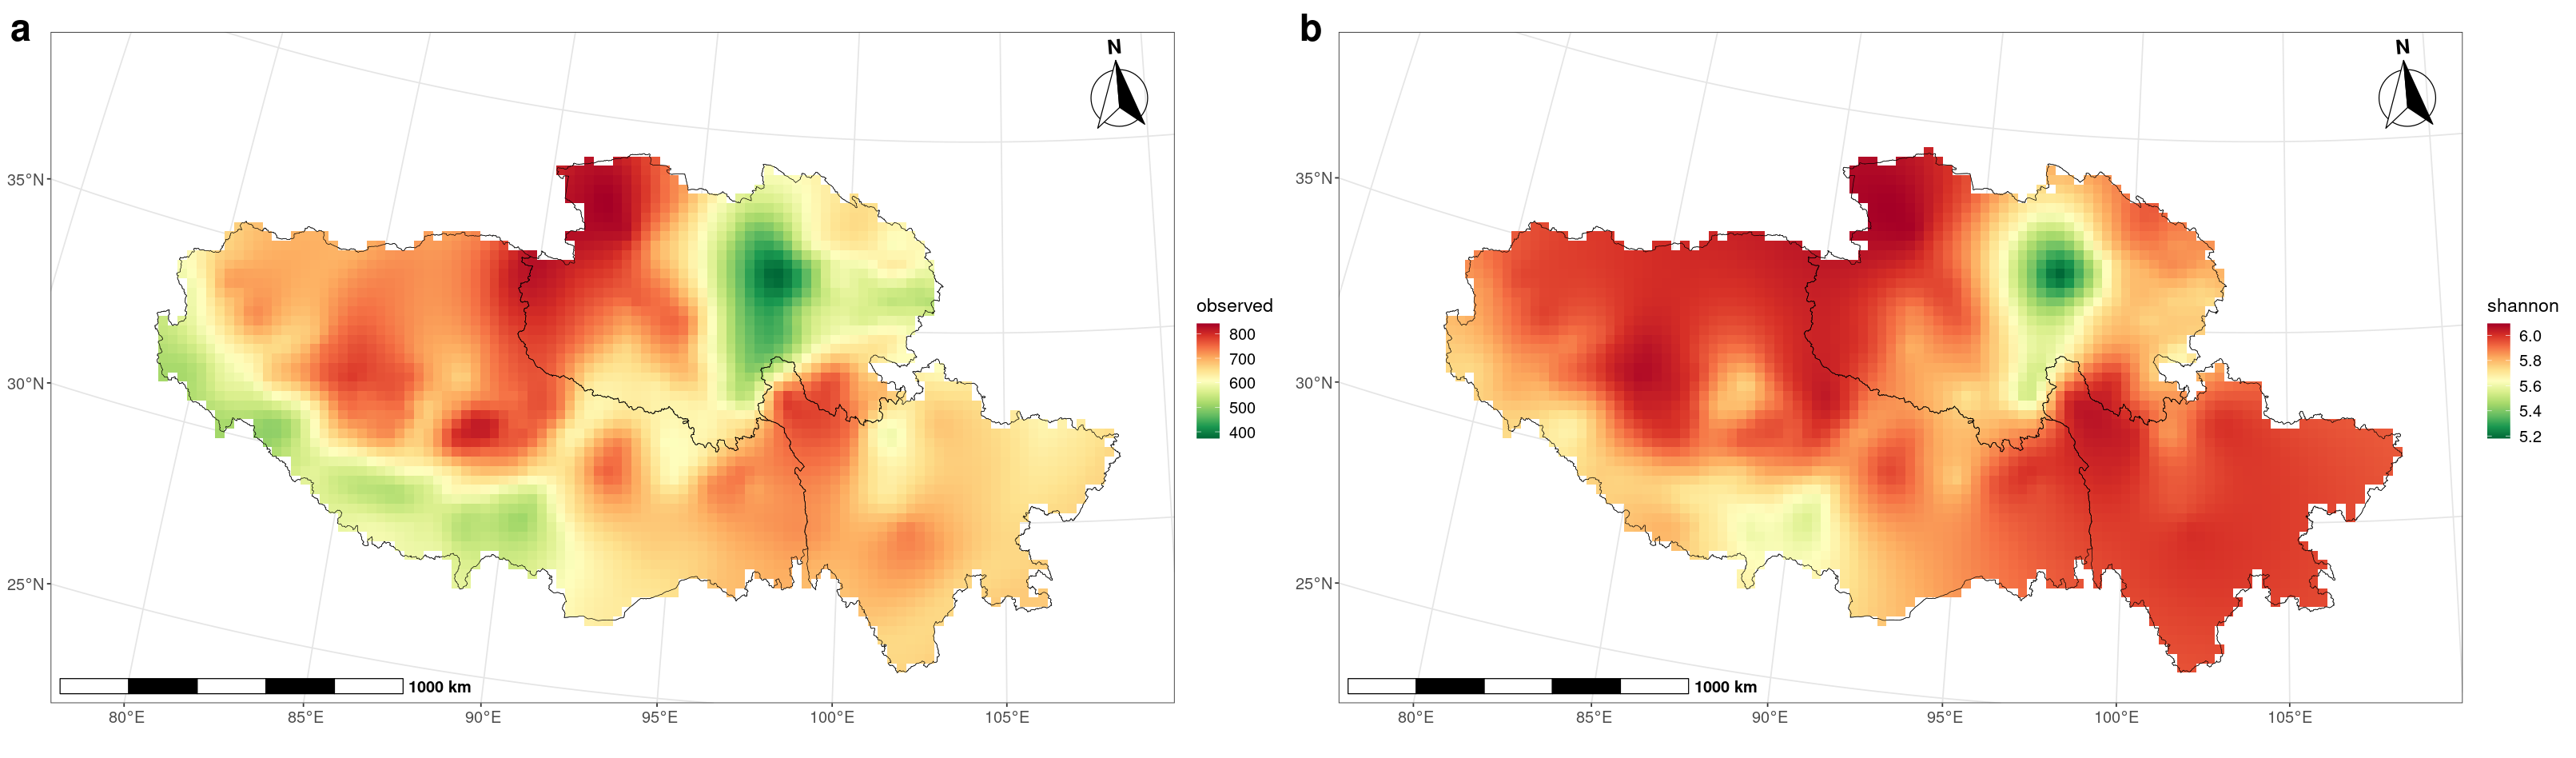

In [10]:
# Visualize kriging interpolation
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
sim9 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = kri.rst.observed) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
sim10 <- plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = kri.rst.shannon) %>% add_scale_bar() %>% add_north_arrow() %>% add_crs()
cowplot::plot_grid(sim9, sim10, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()